# Estimating Pi Using Random Number Generation

The number $\pi \approx 3.1415 \ldots$ is most likely known for it relationship to a circle. For a circle with radius $r$, its perimeter and area is given by the formulas $2\pi r$ and $\pi r^2$ respectively. However it is a number which appears not only in geometry, but in all areas of maths from complex numbers to the summation of infinite series!

One of the most well-known facts about the number $\pi$ is that it is a transcedental number - that is it cannot be written as a quotient of integers or expressed as the solution to a polynomial equation!

There are many ways to approximate the number $pi$ however; see <a href="https://en.wikipedia.org/wiki/Approximations_of_%CF%80">here</a>. 
In this notebook we consider one method to approximate $\pi$ by sampling random numbers uniformaly.

Consider a circle with radius $r$ in which we inscribe a tight square to its boundary. As the square is tight to the circle's boundary, each of its four side lengths is twice the radius. 
Therefore the area of the circle is
\begin{align*}
    area_{circle} &= \pi r^2
\end{align*}
and the area of the square is
\begin{align*}
    area_{square} &= 4r^2.
\end{align*}

Therefore the ratio of the circle's area to the square's area is $\pi / 4$. By approximating this ratio, we can determine an approximation of $\pi$! To do so we will center the circle (and thus the square) at the origin and set the radius to $1$. 
We will uniformly generate $N$ two-dimensional points with coordinates in $[-1,1]$. If the $L_2$ distance from the origin to the point is less than one, we count the point as being in both the circle and the square. Thus after generating all points, we consider the ratio of those in the circle to $N$ as the approximation. We then multiply this value by $4$ to approximate $\pi$.


In [34]:
%matplotlib inline
import numpy.random as rd

# Number of points to generate
N = 10_000_000

points_in = []
points_out = []

for i in range(N):
    # Generate random point
    x, y =  rd.uniform(-1, 1), rd.uniform(-1, 1)
    
    # check if point lies within circle
    if x**2 + y**2 <= 1:
        points_in.append((x,y))
    else:
        points_out.append((x,y))

print(4*len(points_in) / N)

3.1414908


Below are approximations for different values of $N$:
* $N=10,000$: 3.1352
* $N=100,000$: 3.13992
* $N=1,000,000$: 3.138848
* $N=10,000,000$: 3.1414908

with the first ten digits of $\pi \approx 3.1415926535$.

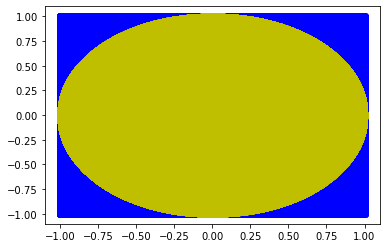

In [35]:
# Plot the points to visualize area of circle

import matplotlib.pyplot as plt
# unzip lists
plt.scatter(*zip(*points_out), c='b')
plt.scatter(*zip(*points_in), c='y')
# Resize figure.
plt.rcParams['figure.figsize'] = [10, 10]

For $N=10,000,000$ it requires almost a minute to both generate and plot the points. If you are in a bind you may want to use the fraction $355/113 = 3.1415929$ as a quicker approximation! 